In [33]:
import pandas as pd
import plotly.express as px


In [34]:
data = pd.read_csv("all_metro_employment.csv")

In [35]:

data['time'] = pd.to_datetime(data['time'])

data['Year'] = data['time'].dt.year
data = data[data['Year']!=2021]
data = data.rename(columns={'Mining, Logging and Construction': 'Employment Rate'})

In [36]:
data

,state,area,time,Total Nonfarm,Employment Rate,Manufacturing,"Trade, Transportation, and Utilities",Information,Financial Activities,Professional and Business Services,Education and Health Services,Leisure and Hospitality,Government,Year
0,Alabama,Anniston-Oxford-Jacksonville,2011-01-01,48.3,1.0,5.7,9.0,0.7,1.3,5.6,5.3,4.5,13.5,2011
1,Alabama,Anniston-Oxford-Jacksonville,2011-02-01,48.2,0.9,5.7,8.9,0.7,1.3,5.7,5.3,4.5,13.5,2011
2,Alabama,Anniston-Oxford-Jacksonville,2011-03-01,48.6,1.0,5.7,9.0,0.7,1.3,5.6,5.3,4.7,13.6,2011
3,Alabama,Anniston-Oxford-Jacksonville,2011-04-01,48.6,0.9,5.7,9.0,0.7,1.3,5.6,5.3,4.8,13.6,2011
4,Alabama,Anniston-Oxford-Jacksonville,2011-05-01,48.6,1.0,5.6,9.1,0.7,1.3,5.6,5.3,4.7,13.6,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57775,Wyoming,Cheyenne,2020-08-01,46.7,3.8,1.3,9.9,0.8,2.3,4.0,4.6,4.8,13.7,2020
57776,Wyoming,Cheyenne,2020-09-01,46.5,3.7,1.2,9.9,0.8,2.3,4.0,4.6,4.7,13.8,2020
57777,Wyoming,Cheyenne,2020-10-01,46.7,3.9,1.2,9.9,0.8,2.3,4.0,4.7,4.6,13.8,2020
57778,Wyoming,Cheyenne,2020-11-01,46.0,3.6,1.2,10.0,0.8,2.2,3.9,4.7,4.4,13.7,2020


In [37]:


now = data.groupby(by =['state','Year'])['Employment Rate'].sum().to_frame(name = 'Employment Rate').reset_index()

now = now.sort_values(by=['state','Year'])
now = now.reset_index(drop = True)
now





,state,Year,Employment Rate
0,Alabama,2011,889.7
1,Alabama,2012,880.3
2,Alabama,2013,870.6
3,Alabama,2014,863.8
4,Alabama,2015,876.6
...,...,...,...
505,Wyoming,2016,106.0
506,Wyoming,2017,102.8
507,Wyoming,2018,110.3
508,Wyoming,2019,118.0


In [38]:
fig = px.line(data_frame =now , x= 'Year', y= "Employment Rate" ,facet_col="state", facet_col_wrap=10)
             
fig.update_layout(
    autosize=True, 
    width=1800,
    height=1400,
    margin=dict(
        
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
fig.update_layout(title=f"Figure : Overall Employment trend in construction across all states from 2011 - 2020 ", title_y = 0.01, title_x = 0.5)

fig.update_xaxes(title_text ='Year')
fig.update_yaxes(matches = None, showticklabels = True, visible = True)


In [39]:
import csv
from collections import defaultdict
import plotly.express as px
import cv2
from matplotlib import pyplot as plt

def main():
    def anon():
        return defaultdict(float)
    state_yr_to_y = defaultdict(anon)
    with open('all_metro_employment.csv') as data:
        reader = csv.DictReader(data)
        for row in reader:
            year = row['time'][-4:]
            if year == '2021':
                continue
            state = row['state']
            state_yr_to_y[state][year] += float(row['Mining, Logging and Construction'])
    ctr = 1
   
    plot_dict = {'States': list(state_yr_to_y.keys())}
    plot_dict['Employment rate'] = [sum(state_yr_to_y[key].values()) for key in plot_dict['States']]

      
    mx,mn = max(plot_dict['Employment rate']),min(plot_dict['Employment rate'])
    res = []
    for i in plot_dict['Employment rate']:
        if i in (mn,mx):
            res.append(int(i))
        else:
            res.append("")
    fig = px.line(plot_dict, x='States', y='Employment rate', text=res, width=1000)
    fig.update_layout(title=f"Overall trend in construction sector in all states", title_y=0.01)

    print(fig.show())

main()

None


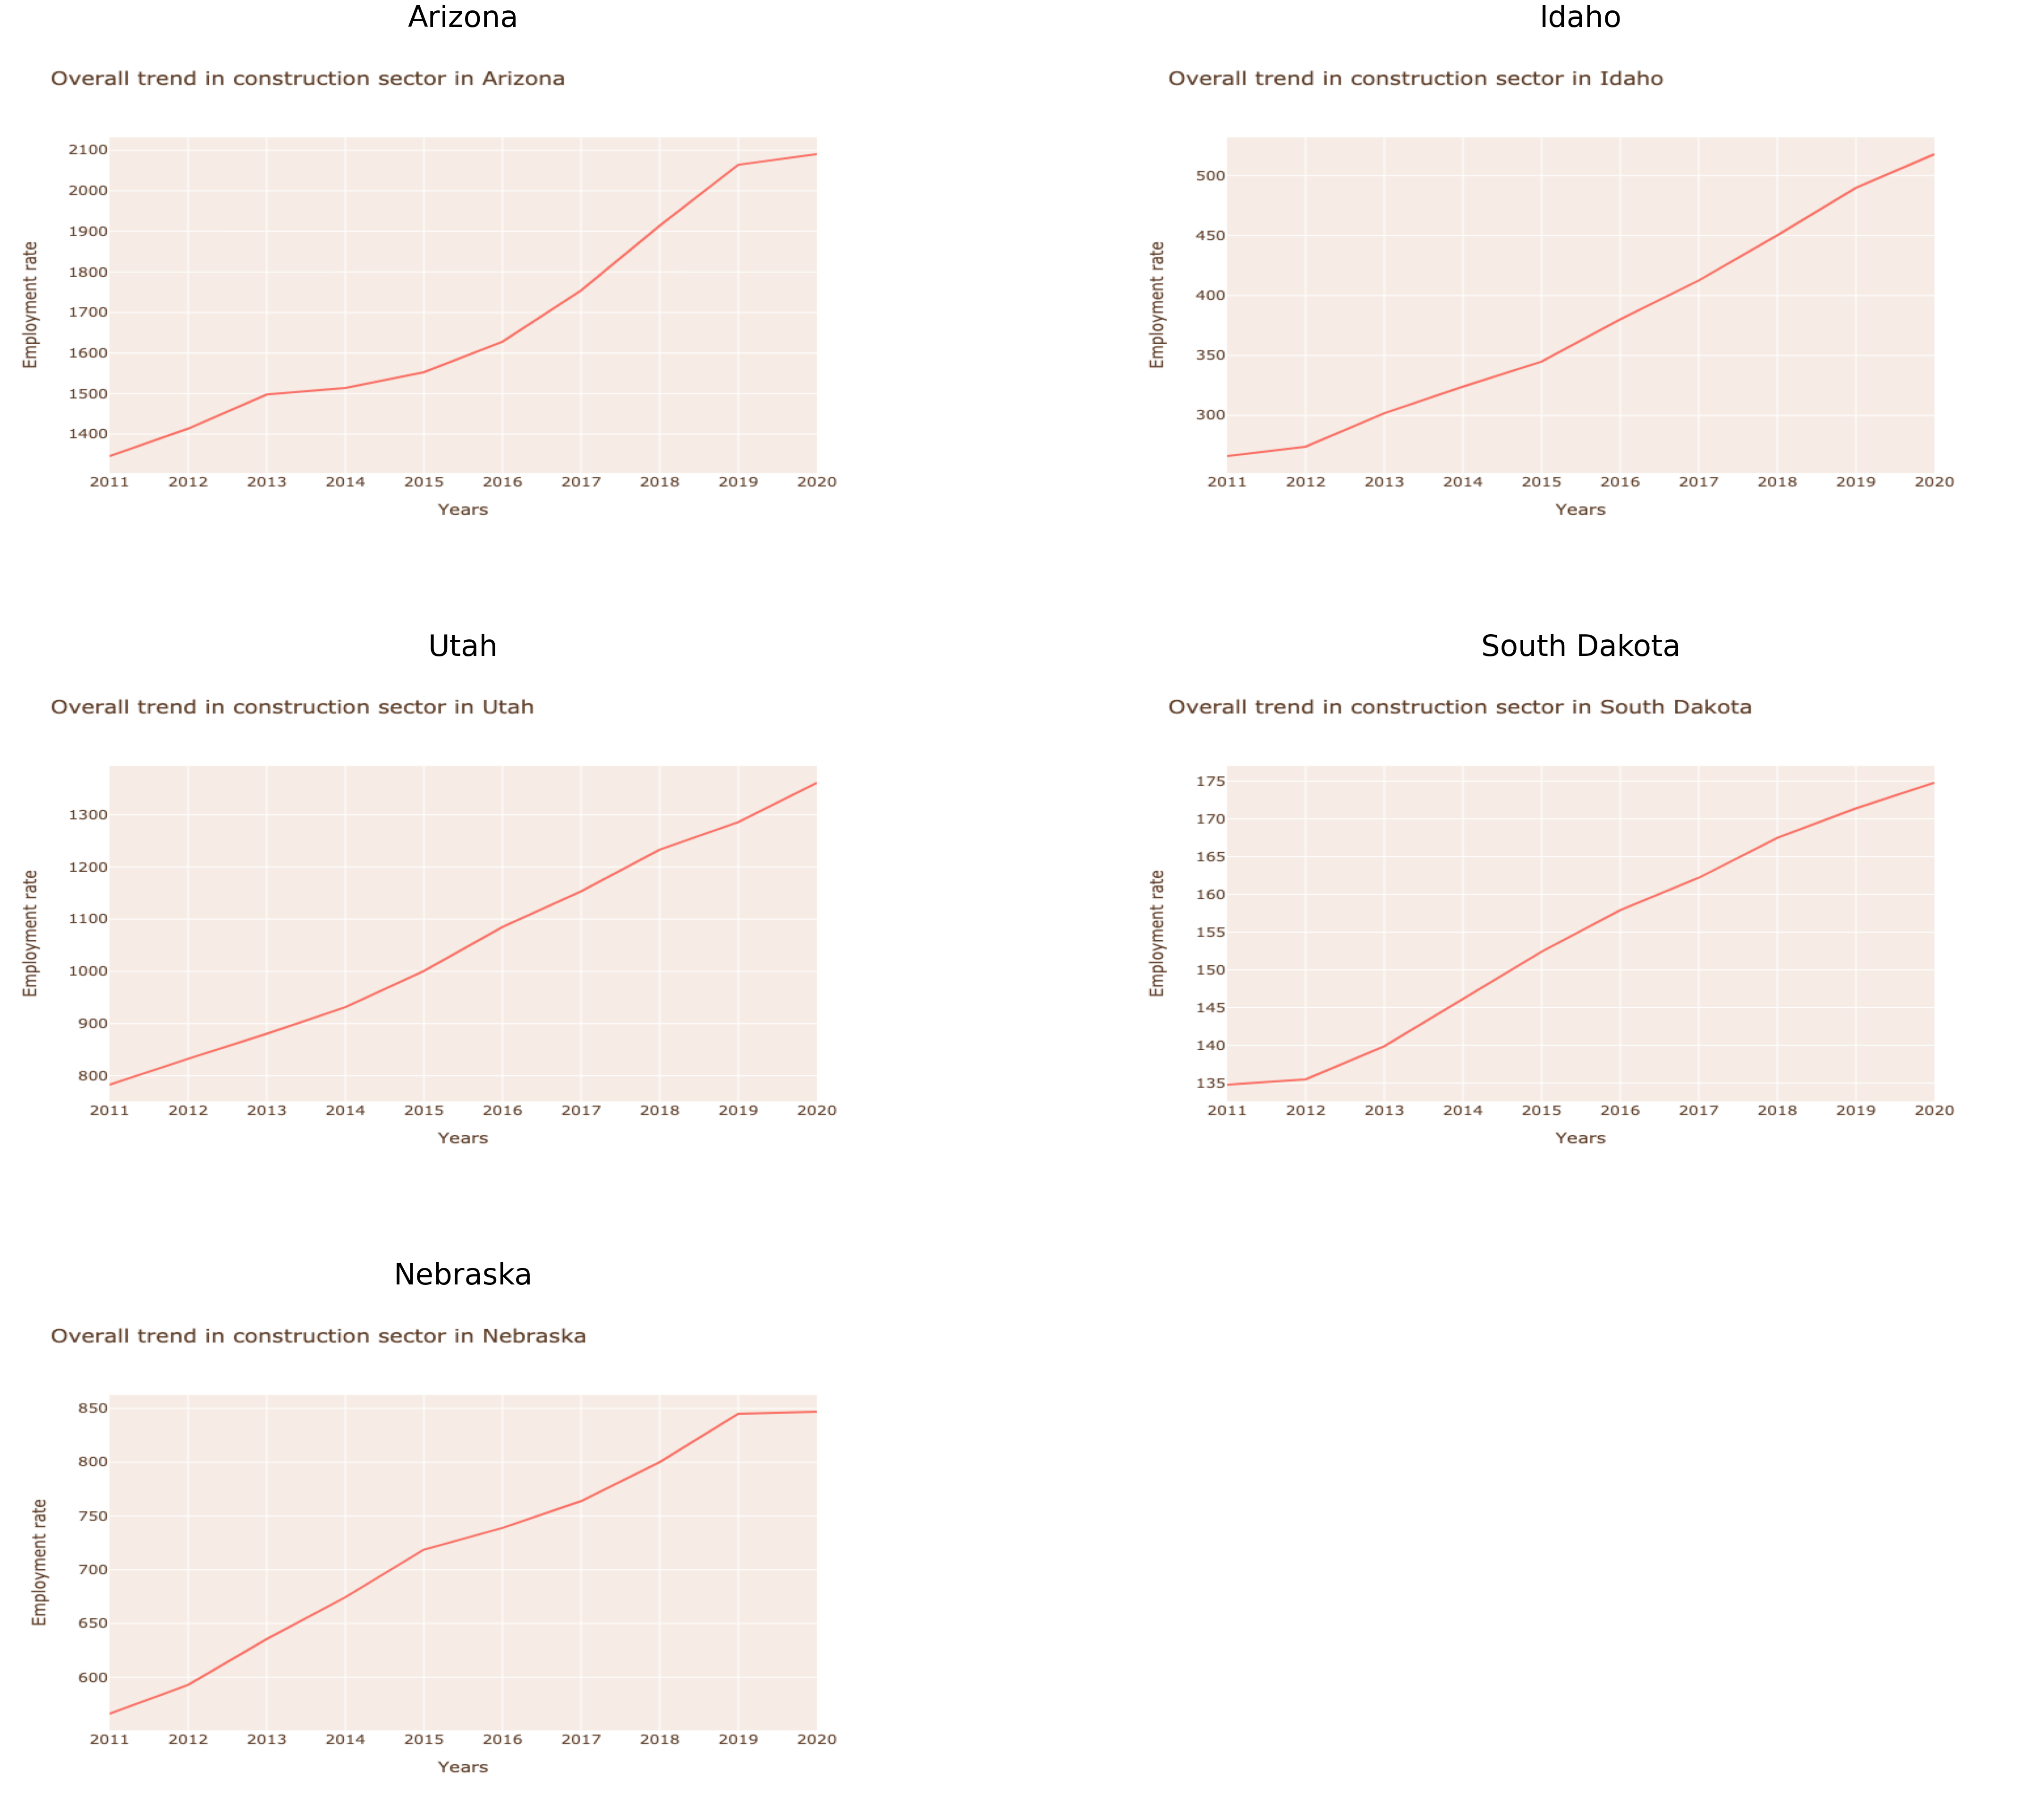

In [40]:
import cv2
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(56, 49))
rows = 3
columns = 2
# reading images
Image1 = cv2.imread("./images/Arizona.png")
Image2 = cv2.imread('./images/Idaho.png')
Image3 = cv2.imread('./images/Utah.png')
Image4 = cv2.imread('./images/South Dakota.png')
Image5 = cv2.imread('./images/Nebraska.png')
fig.add_subplot(rows, columns, 1)
plt.imshow(Image1, aspect=0.8)
plt.axis('off')
plt.title("Arizona",fontsize= 45)
fig.add_subplot(rows, columns, 2)
plt.imshow(Image2, aspect=0.8)
plt.axis('off')
plt.title("Idaho",fontsize= 45)

fig.add_subplot(rows, columns, 3)
plt.imshow(Image3,aspect=0.8)
plt.axis('off')
plt.title("Utah",fontsize= 45)

fig.add_subplot(rows, columns, 4)
plt.imshow(Image4,aspect=0.8)
plt.axis('off')
plt.title("South Dakota",fontsize= 45)

fig.add_subplot(rows, columns, 5)
plt.imshow(Image5,aspect=0.8)
plt.axis('off')
plt.title("Nebraska",fontsize= 45)

# plt.savefig("uneven.jpg")
plt.show()


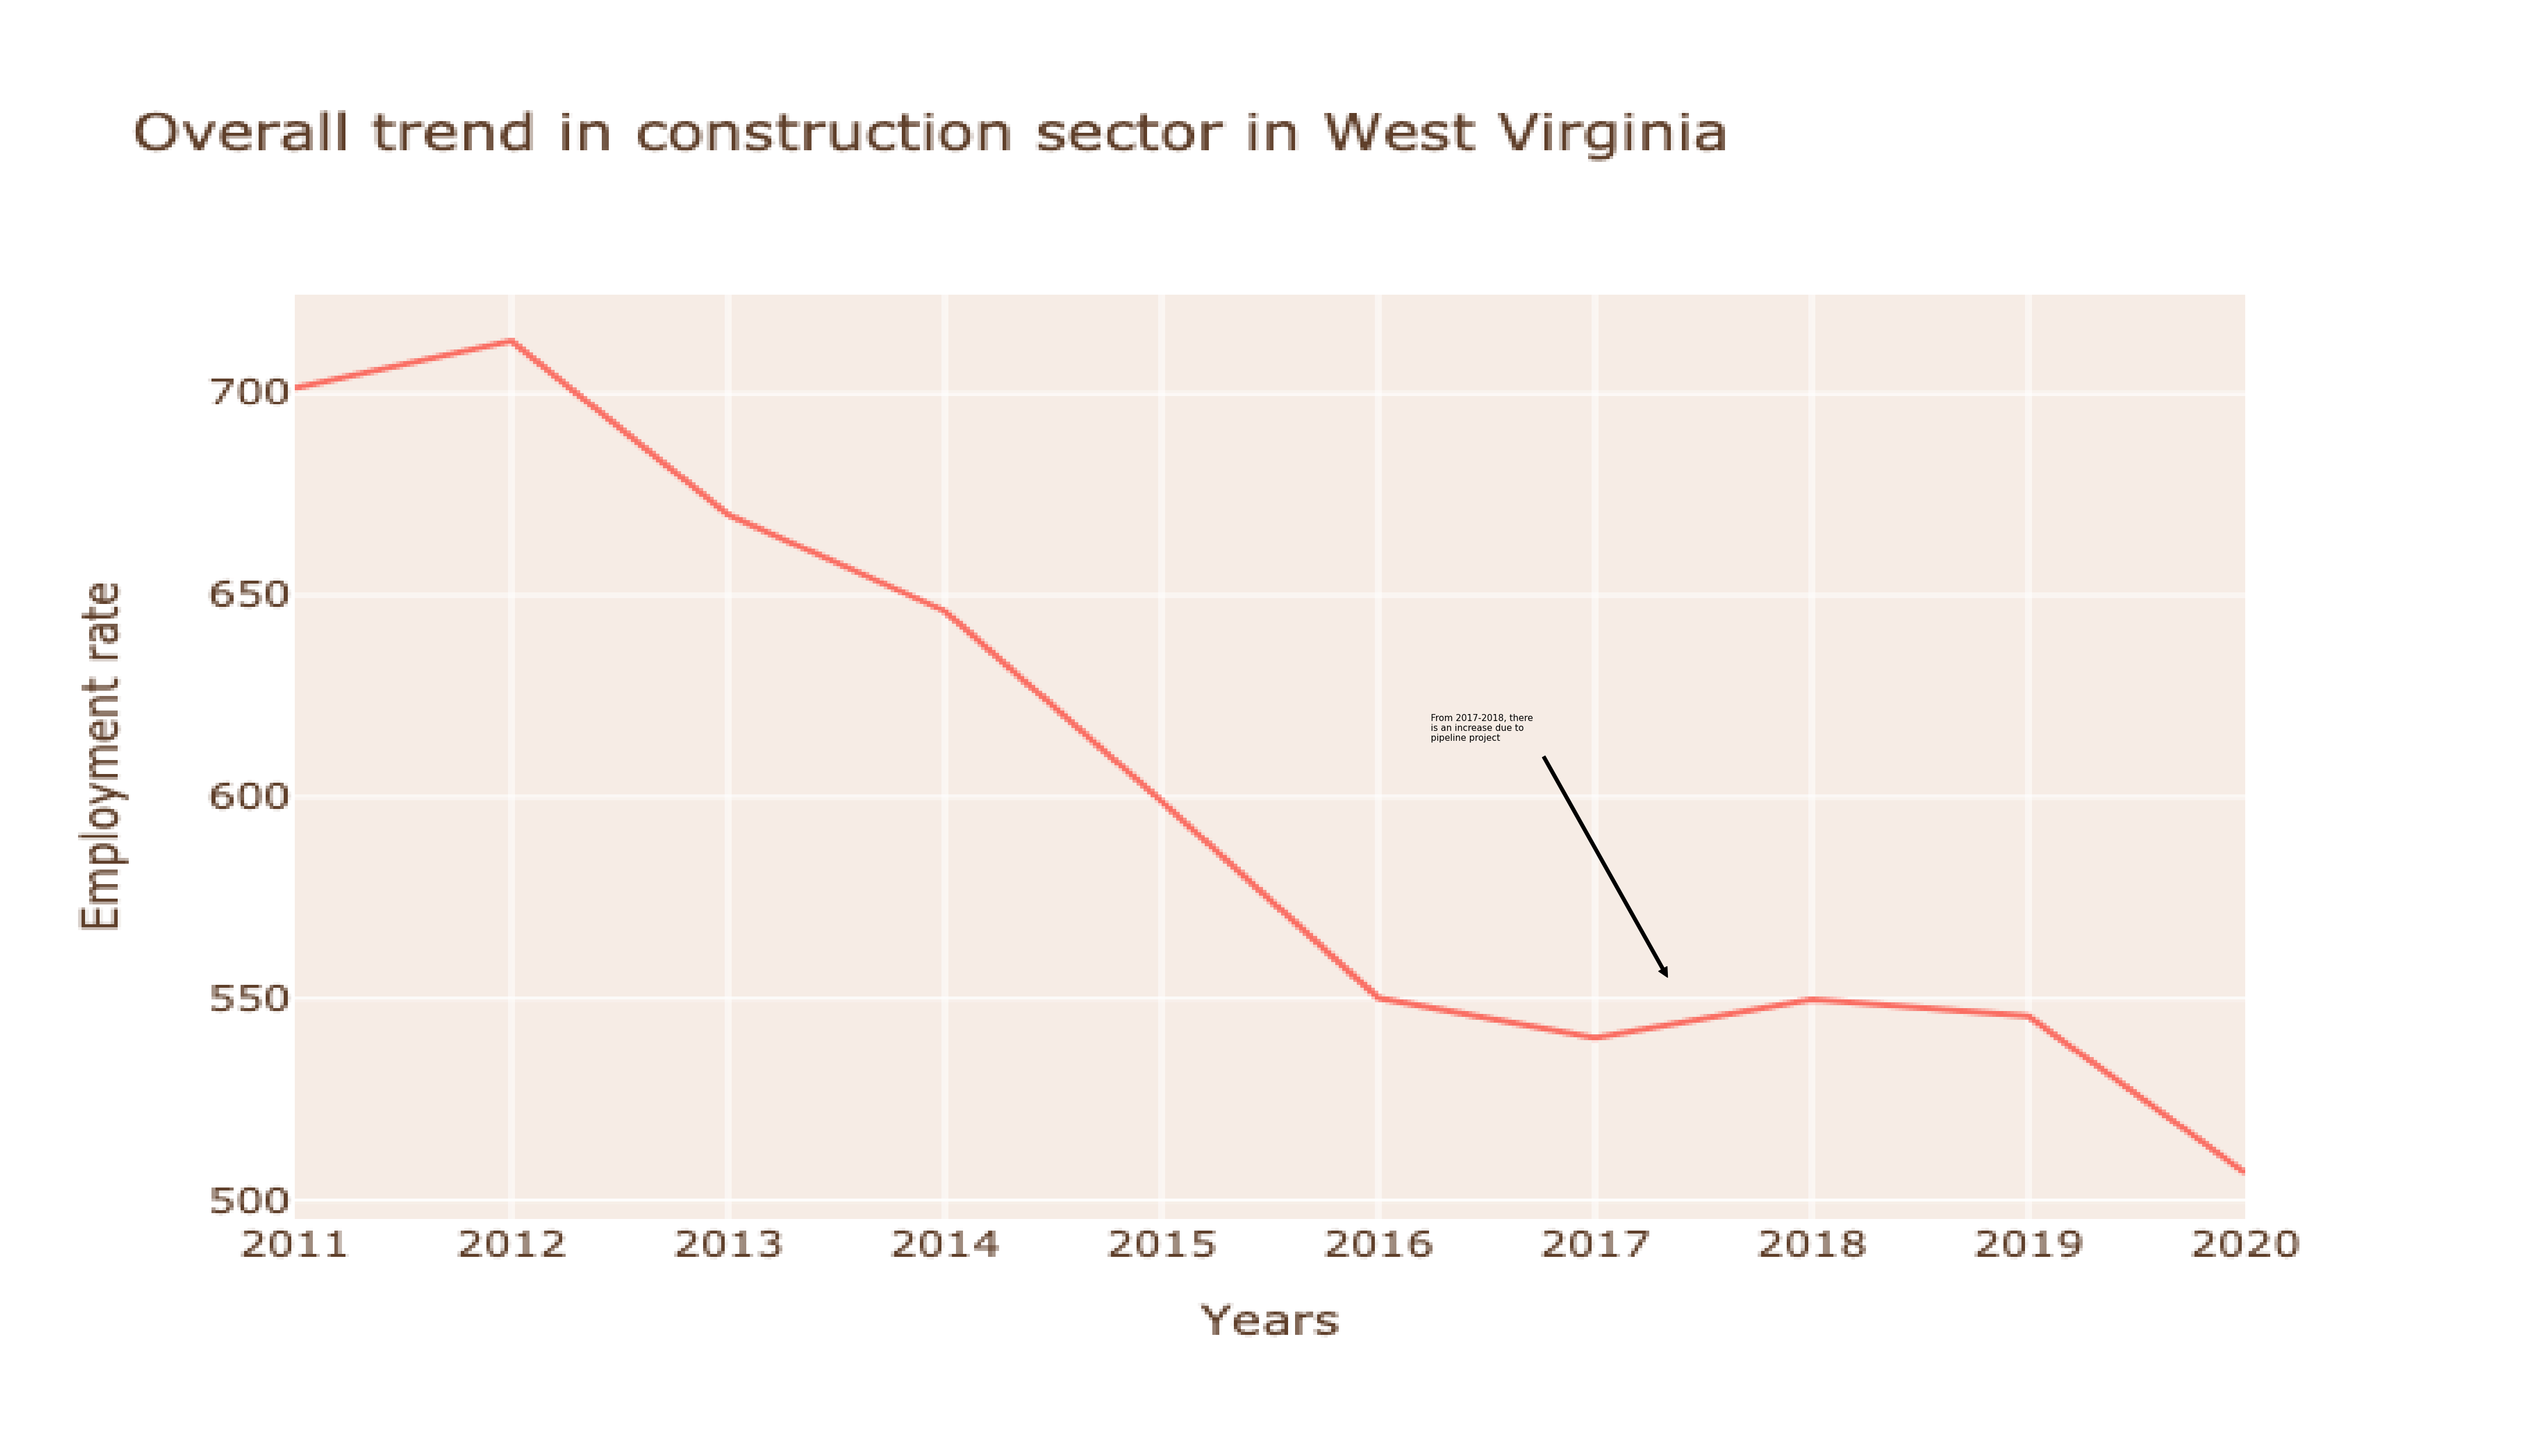

In [41]:
import cv2
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(56, 49))
# reading images
Image1 = cv2.imread("./images/West Virginia.png")
fig.add_subplot(111)
plt.imshow(Image1, aspect=0.8)
plt.axis('off')

plt.annotate(
    # Label and coordinate
    'From 2017-2018, there \nis an increase due to \npipeline project', xy=(461.5, 340.1), xytext=(394, 254),
    # Custom arrow
    size=11, arrowprops=dict(facecolor='black', shrink=0.05))
plt.savefig("./images/west.png")
plt.show()
